In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.mlab as mlab
import scipy.stats as stats

In [56]:
#Load the Player List 
BatterList = pd.read_csv("./DataBaseCrawler/MLBBatterRoster2018.csv",index_col=0)
PitcherList = pd.read_csv("./DataBaseCrawler/MLBPitcherRoster2018.csv",index_col=0)
BatterList = BatterList[['Name', 'Team','ID']]
PitcherList= PitcherList[['Name', 'Team','ID']]

In [57]:
#Get IDs for our line up.
NamesBatter = ['Nolan Arenado','Charlie Blackmon','Trevor Story','Bryce Harper','Anthony Rizzo','Corey Dickerson','Willson Contreras','Buster Posey']
NamesPitcher = ['Lance Lynn','Gio Gonzalez']
LineUpBatter = BatterList[BatterList['Name'].isin(NamesBatter)]
LineUpPitcher = PitcherList[PitcherList['Name'].isin(NamesPitcher)]

In [58]:
LineUpPitcher.head()

,Name,Team,ID
14,Lance Lynn,Yankees,2520
329,Gio Gonzalez,Nationals,7448
526,Lance Lynn,Twins,2520


In [59]:
LineUpBatter

,Name,Team,ID
44,Anthony Rizzo,Cubs,3473
50,Willson Contreras,Cubs,11609
243,Bryce Harper,Nationals,11579
305,Corey Dickerson,Pirates,10762
434,Buster Posey,Giants,9166
467,Nolan Arenado,Rockies,9777
470,Charlie Blackmon,Rockies,7859
476,Trevor Story,Rockies,12564


In [60]:
#Get the Gamelogs for each Pitcher
Gio = pd.read_csv("./DataBaseCrawler/GameLogs/Pitchers/2520GL.csv",index_col=0)
Gio= Gio['DKfp'][1:].values
Dan = pd.read_csv("./DataBaseCrawler/GameLogs/Pitchers/7448GL.csv",index_col=0)
Dan = Dan['DKfp'][1:].values

In [63]:
#Sum the points on the given days
Total = Dan[:207] + Gio[:207]
Lengths = [len(Gio), len(Dan)]
for IDs in LineUpBatter['ID']:
    Batter = pd.read_csv("./DataBaseCrawler/GameLogs/Batters/"+str(IDs)+"GL.csv",index_col=0)
    Row = Batter['DKfp'][1:].values
    Total = Total + Row[:207]
    Lengths.append(len(Row))

In [64]:
Lengths

[207, 306, 1023, 299, 894, 669, 1141, 840, 884, 365]

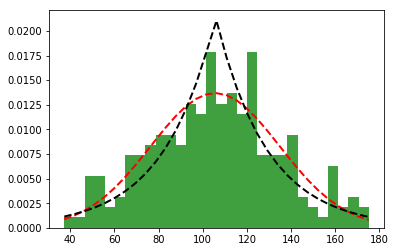

In [65]:
#Make Best Fits
(muN, sigmaN) = stats.norm.fit(Total)
(muL, sigmaL) = stats.laplace.fit(Total)
n, bins, patches = plt.hist(Total, 30, normed=1, facecolor='green', alpha=0.75)
y = mlab.normpdf(bins, muN, sigmaN)
y1 = stats.laplace.pdf(bins, muL, sigmaL)
l = plt.plot(bins, y, 'r--', linewidth=2)
l = plt.plot(bins, y1, 'k--', linewidth=2)

In [71]:
muN

105.63900966183576

In [72]:
sigmaN**2

850.2832638743026

In [73]:
(muL, sigmaL) = stats.laplace.fit(Total)

In [74]:
muL

105.85000000671427

In [75]:
sigmaL

23.390744348201963